Epoch 1/30
300/300 [==============================] - 66s 216ms/step - loss: 0.5385 - accuracy: 0.8311 - val_loss: 0.0527 - val_accuracy: 0.9838

Epoch 00001: val_loss improved from inf to 0.05275, saving model to ./model cnn\01- 0.0527.hdf5
Epoch 2/30
300/300 [==============================] - 62s 207ms/step - loss: 0.0961 - accuracy: 0.9724 - val_loss: 0.0390 - val_accuracy: 0.9869

Epoch 00002: val_loss improved from 0.05275 to 0.03902, saving model to ./model cnn\02- 0.0390.hdf5
Epoch 3/30
300/300 [==============================] - 63s 211ms/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 0.0374 - val_accuracy: 0.9865

Epoch 00003: val_loss improved from 0.03902 to 0.03737, saving model to ./model cnn\03- 0.0374.hdf5
Epoch 4/30
300/300 [==============================] - 62s 206ms/step - loss: 0.0566 - accuracy: 0.9827 - val_loss: 0.0324 - val_accuracy: 0.9894

Epoch 00004: val_loss improved from 0.03737 to 0.03242, saving model to ./model cnn\04- 0.0324.hdf5
Epoch 5/30
300/300 [

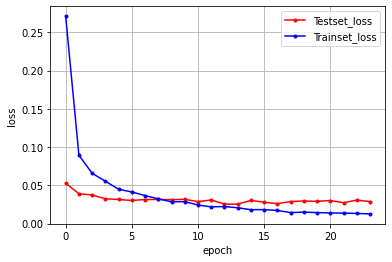

In [4]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

# seed값 설정하기
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# 정규화작업하기 0~1 사이의 값으로
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float')/ 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float') / 255

# 원핫인코딩작업 0~9 까지 되어있는 레이블을 0, 1 형태로 만들어주기.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 컨볼루션 신경망 설정하기
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', metrics=['accuracy'])

# 모델 최적화 설정하기
Model_Dir = './model cnn/'
if not os.path.exists(Model_Dir):
    os.mkdir(Model_Dir)
    
modelpath = "./model cnn/{epoch:02d}-{val_loss: .4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1
                               , save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

# 모델 실행하기
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30,
                   batch_size = 200, verbose = 1, callbacks = [early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현하기
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = "red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하기
plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Epoch 00001: val_loss improved from inf to 0.05275, saving model to ./model\01-0.0527.hdf5

Epoch 00002: val_loss improved from 0.05275 to 0.03902, saving model to ./model\02-0.0390.hdf5

Epoch 00003: val_loss improved from 0.03902 to 0.03737, saving model to ./model\03-0.0374.hdf5

Epoch 00004: val_loss improved from 0.03737 to 0.03242, saving model to ./model\04-0.0324.hdf5

Epoch 00005: val_loss improved from 0.03242 to 0.03150, saving model to ./model\05-0.0315.hdf5

Epoch 00006: val_loss improved from 0.03150 to 0.03019, saving model to ./model\06-0.0302.hdf5

Epoch 00007: val_loss did not improve from 0.03019

Epoch 00008: val_loss did not improve from 0.03019

Epoch 00009: val_loss did not improve from 0.03019

Epoch 00010: val_loss did not improve from 0.03019

Epoch 00011: val_loss improved from 0.03019 to 0.02872, saving model to ./model\11-0.0287.hdf5

Epoch 00012: val_loss did not improve from 0.02872

Epoch 00013: val_loss improved from 0.02872 to 0.02553, saving model to

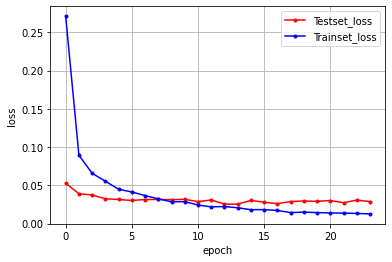

In [15]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
